Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

### Questions to be answered would include:

1. What was the change in price of the stock over time?

2. What was the daily return of the stock on average?

3. What was the moving average of the various stocks?

4. What was the correlation between different stocks'?

5. How much value do we put at risk by investing in a particular stock?

6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
# %matplotlib inline
# import yfinance as yf
# from pandas_datareader import data as pdr

# yf.pdr_override()

# # For time stamps
# from datetime import datetime, timedelta

# # The tech stocks we'll use for this analysis
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# # Set up End and Start times for data grab
# tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# end = datetime.now() - timedelta(days=7)  # Get data up to 1 week ago
# # start = end - timedelta(days=365)  # Data from 1 year ago to 1 week ago
# start = datetime(2012, 1, 1)  # Data from January 1, 2012

# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start, end)

# company_list = [AAPL, GOOG, MSFT, AMZN]
# company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# for company, com_name in zip(company_list, company_name):
#     company["company_name"] = com_name
    
# df = pd.concat(company_list, axis=0)
# df.head(10)
# df.tail(10)

# df.to_csv('N_Stock_Markets.csv', index=True)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime, timedelta


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now() - timedelta(days=7)
# end = datetime.now() - timedelta(days=7)  # Get data up to 1 week ago
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# for stock in tech_list:
#     globals()[stock] = yf.download(stock, start, end)
#     globals()[stock] = globals()[stock].reset_index().rename(columns={'Date': 'date'})
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)
df.tail(10)

df.to_csv('N_Stock_Markets.csv', index=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-29,146.100006,146.720001,140.679993,142.479996,141.639740,128138200,APPLE
2022-09-30,141.279999,143.100006,138.000000,138.199997,137.384979,124925300,APPLE
2022-10-03,138.210007,143.070007,137.690002,142.449997,141.609924,114311700,APPLE
2022-10-04,145.029999,146.220001,144.259995,146.100006,145.238388,87830100,APPLE
2022-10-05,144.070007,147.380005,143.009995,146.399994,145.536621,79471000,APPLE


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-25,129.360001,131.779999,128.770004,131.270004,131.270004,46017800,AMAZON
2023-09-26,130.119995,130.389999,125.279999,125.980003,125.980003,73048200,AMAZON
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400,AMAZON
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000,AMAZON
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600,AMAZON


In [5]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-29,146.100006,146.720001,140.679993,142.479996,141.639740,128138200,APPLE
2022-09-30,141.279999,143.100006,138.000000,138.199997,137.384979,124925300,APPLE
2022-10-03,138.210007,143.070007,137.690002,142.449997,141.609924,114311700,APPLE
2022-10-04,145.029999,146.220001,144.259995,146.100006,145.238388,87830100,APPLE
2022-10-05,144.070007,147.380005,143.009995,146.399994,145.536621,79471000,APPLE


In [6]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700,APPLE
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900,APPLE
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800,APPLE
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400,APPLE
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200,APPLE


In [7]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,161.725199,163.459564,160.157064,161.861032,161.446210,6.742444e+07
std,19.176147,18.930746,19.405325,19.137407,19.322346,2.222910e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.817505,147.360004,144.072502,145.924995,145.292118,5.123818e+07
50%,161.320000,162.099998,159.930000,160.785004,160.346390,6.262345e+07
75%,177.749996,179.645004,176.617504,177.797497,177.617649,7.723412e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [8]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-09-29 to 2023-09-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


### 1. What was the change in price of the stock overtime?

The Close Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

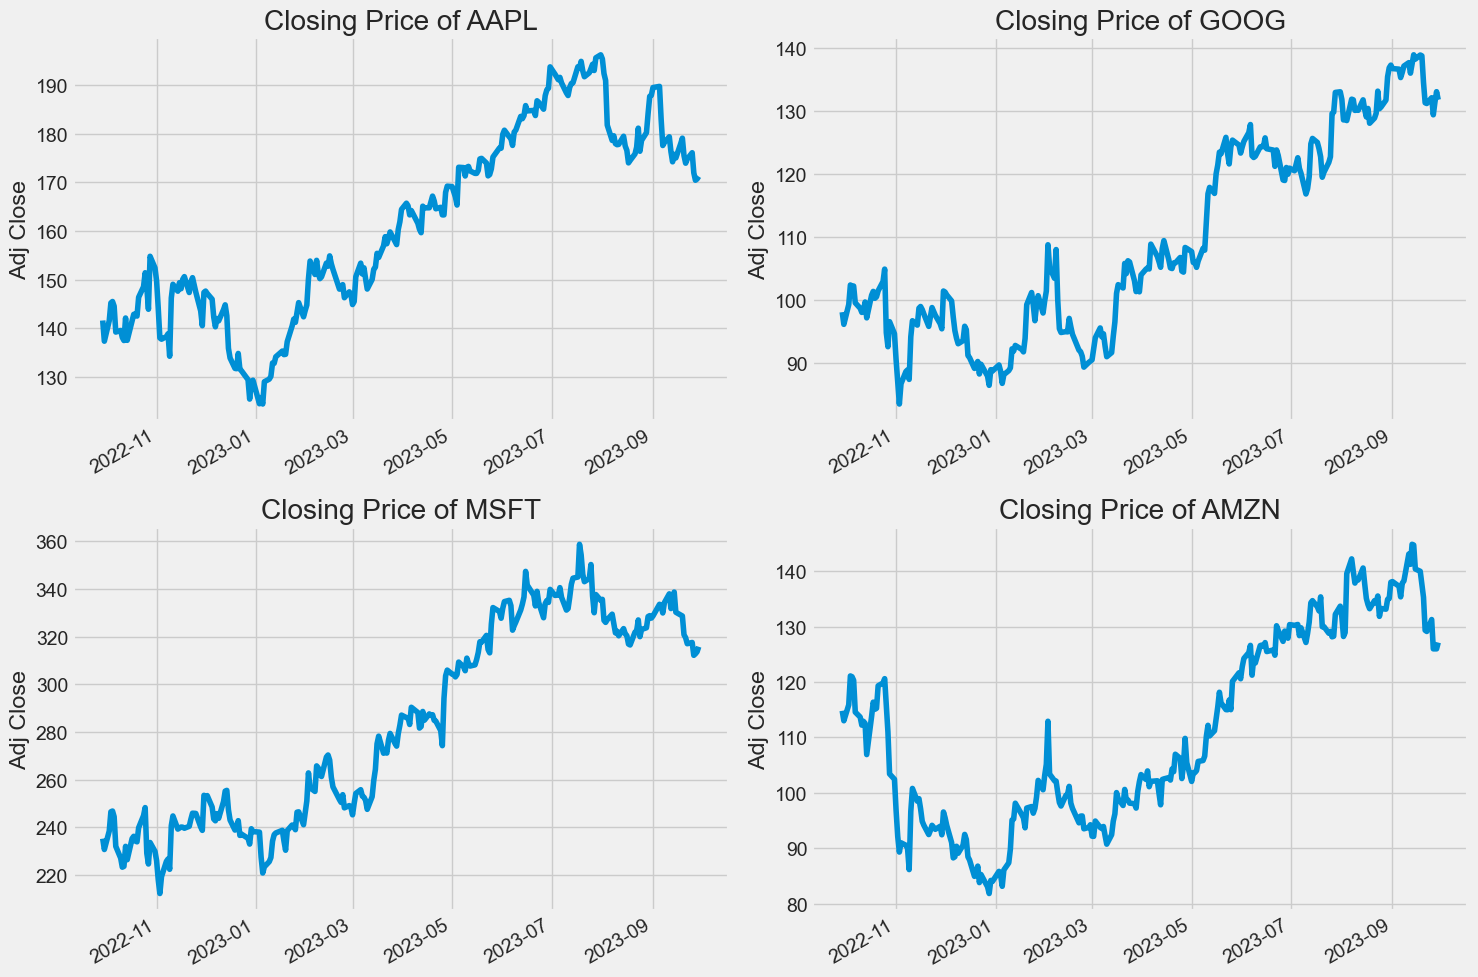

In [9]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

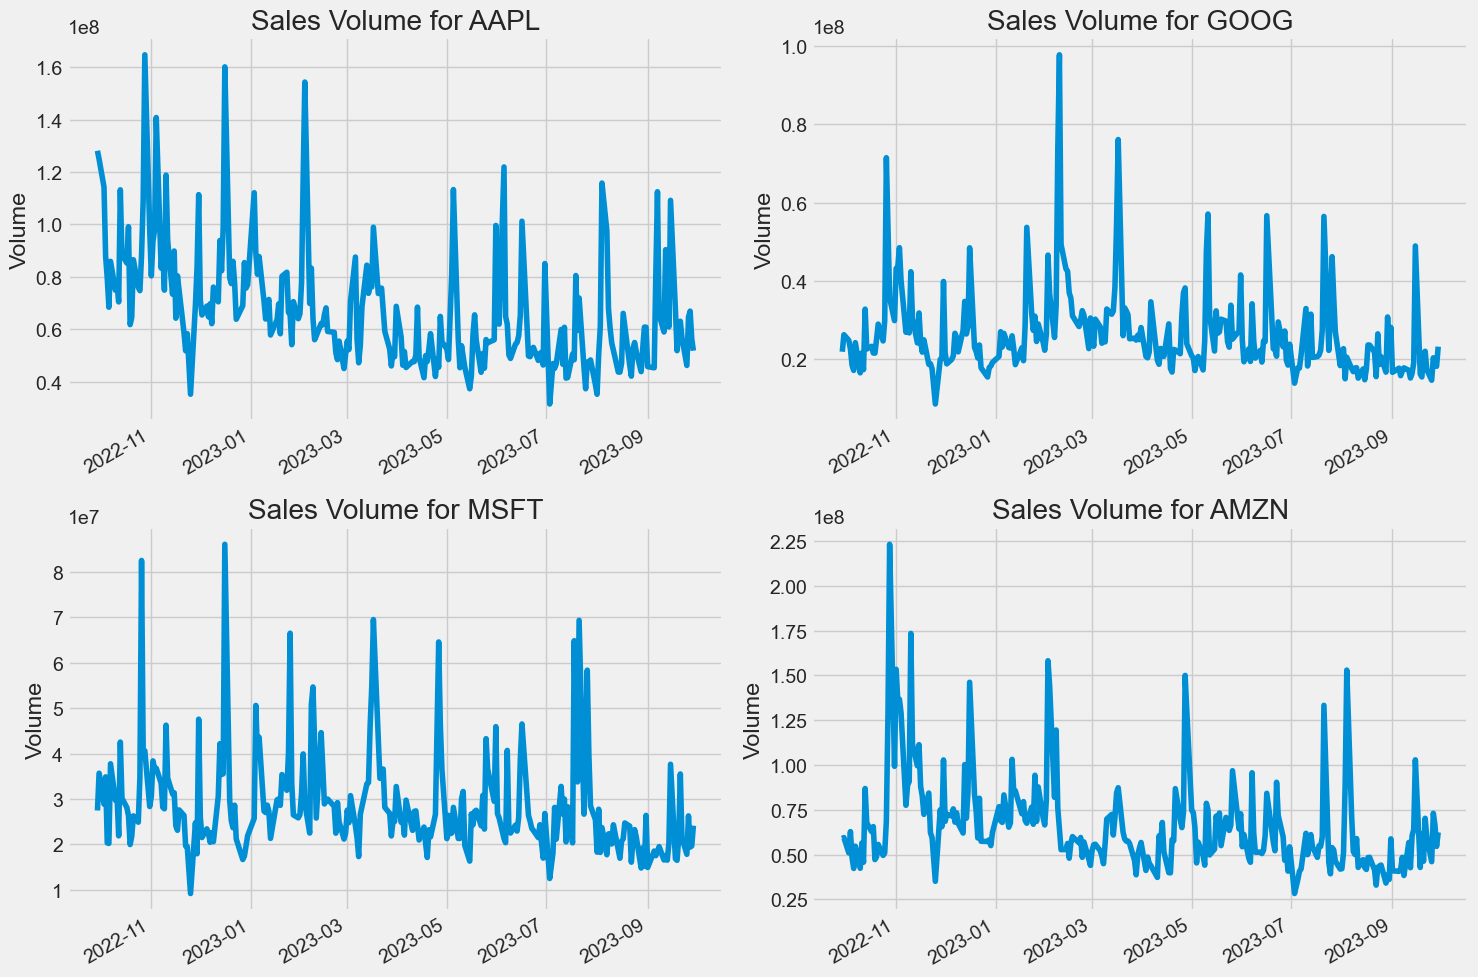

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

### 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. 

The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period chosen.

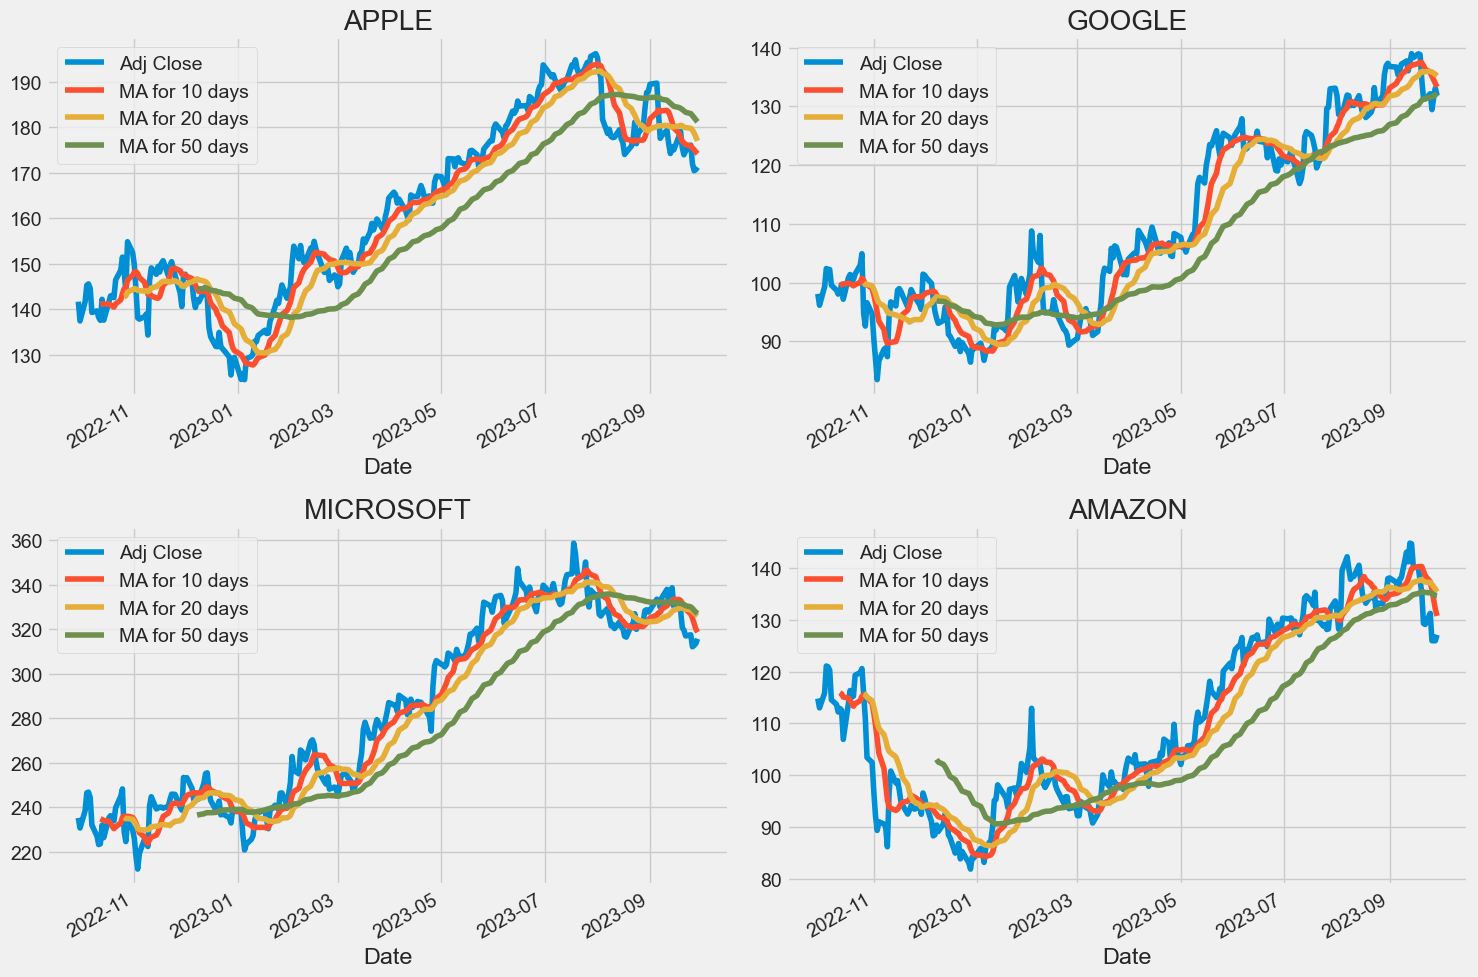

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. 

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. 

Using Pandas, We'd Retrieve the daily returns for the Apple stock.

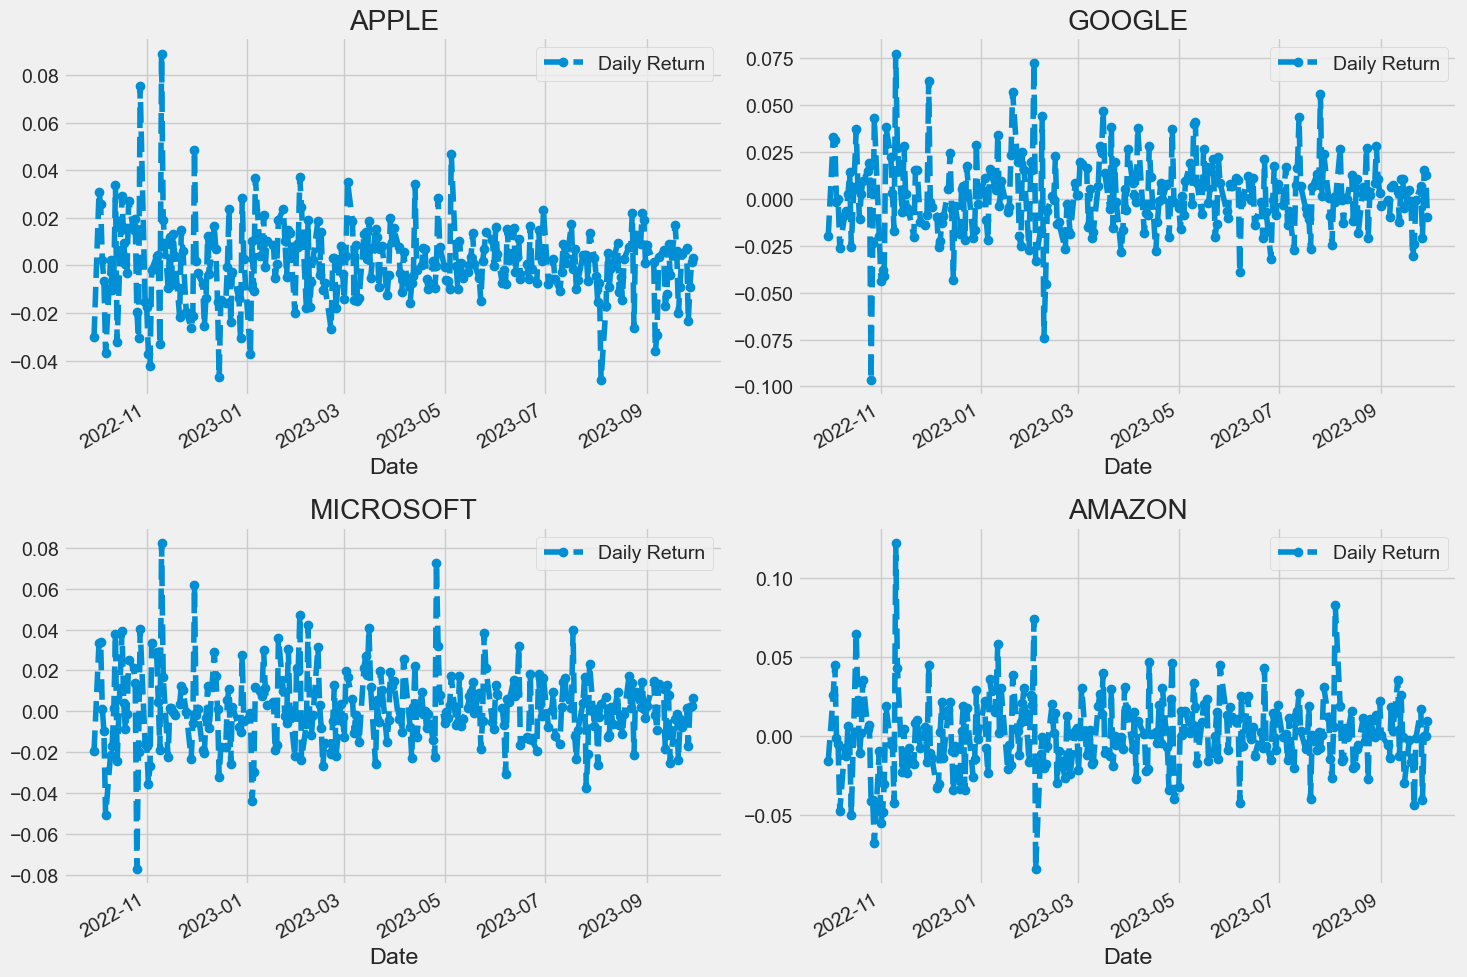

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now, let's get an overall look at the average daily return using a histogram.

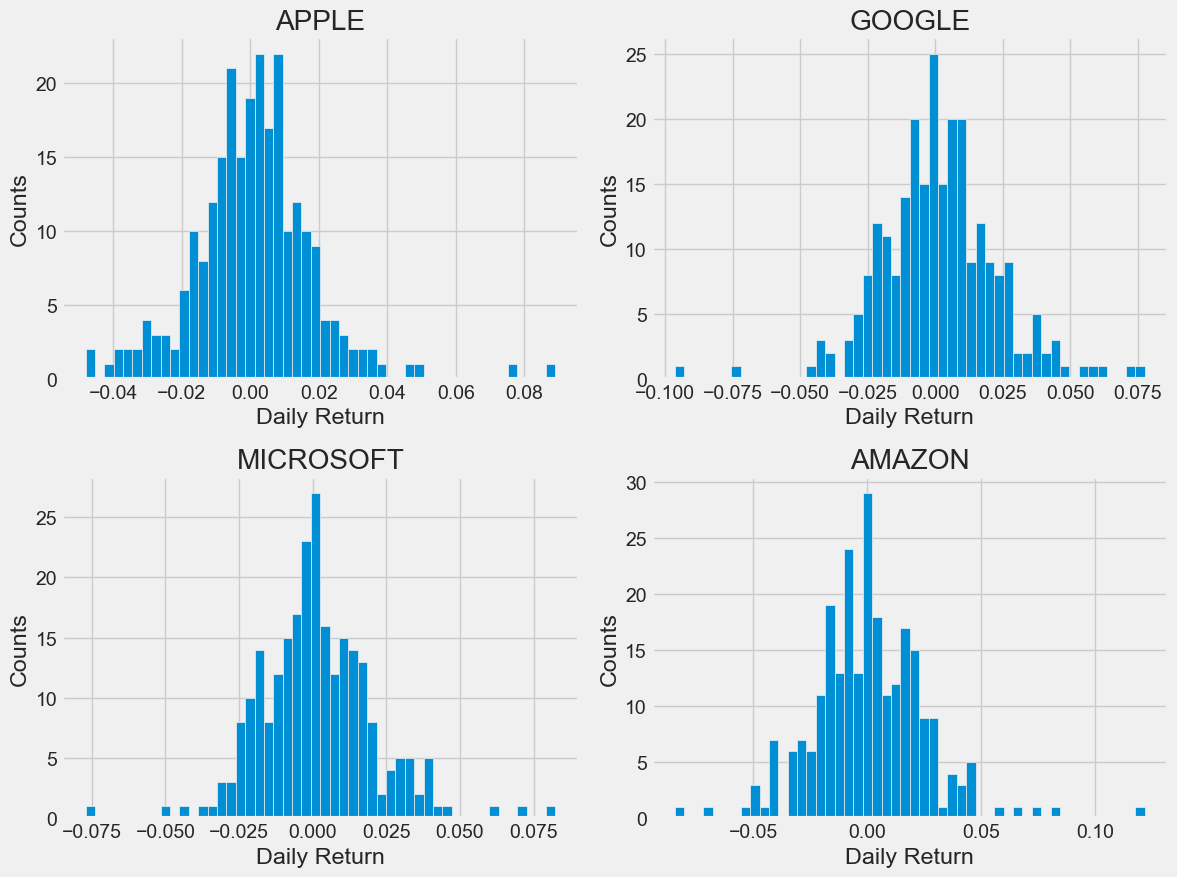

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

### 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0

To analyze the returns of all the stocks in our list.....

We'd build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-29,NaN,NaN,NaN,NaN
2022-09-30,-0.030039,-0.015679,-0.019778,-0.019368
2022-10-03,0.030753,0.025487,0.032761,0.033663
2022-10-04,0.025623,0.044960,0.031319,0.033812
2022-10-05,0.002053,-0.001156,-0.001855,0.001286


We can compare the daily percentage return of two stocks to check how correlated. 

But First, let's see a sotck compared to itself.

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

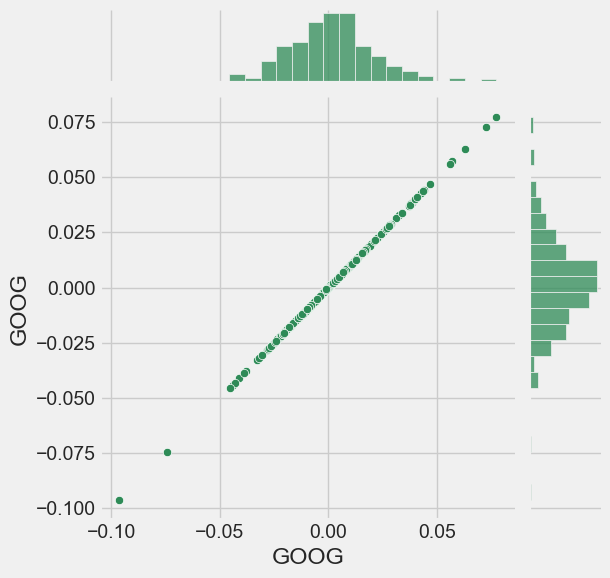

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

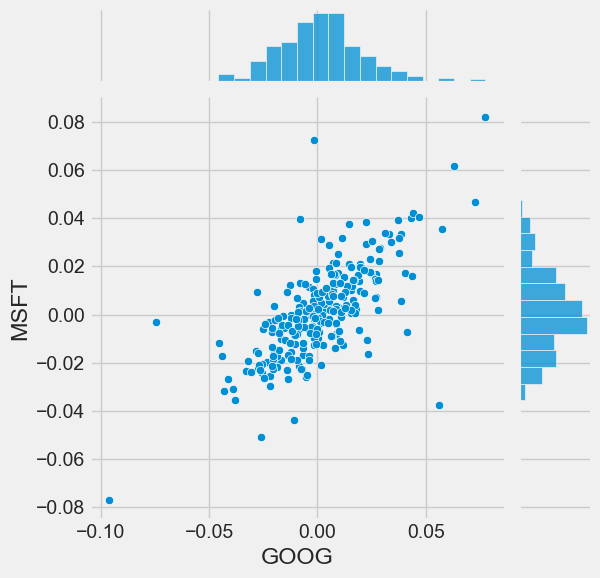

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

With this display, we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Using Seaborn and Pandas, we'd now visualize this comparison for every combination of stocks in our stock list.

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

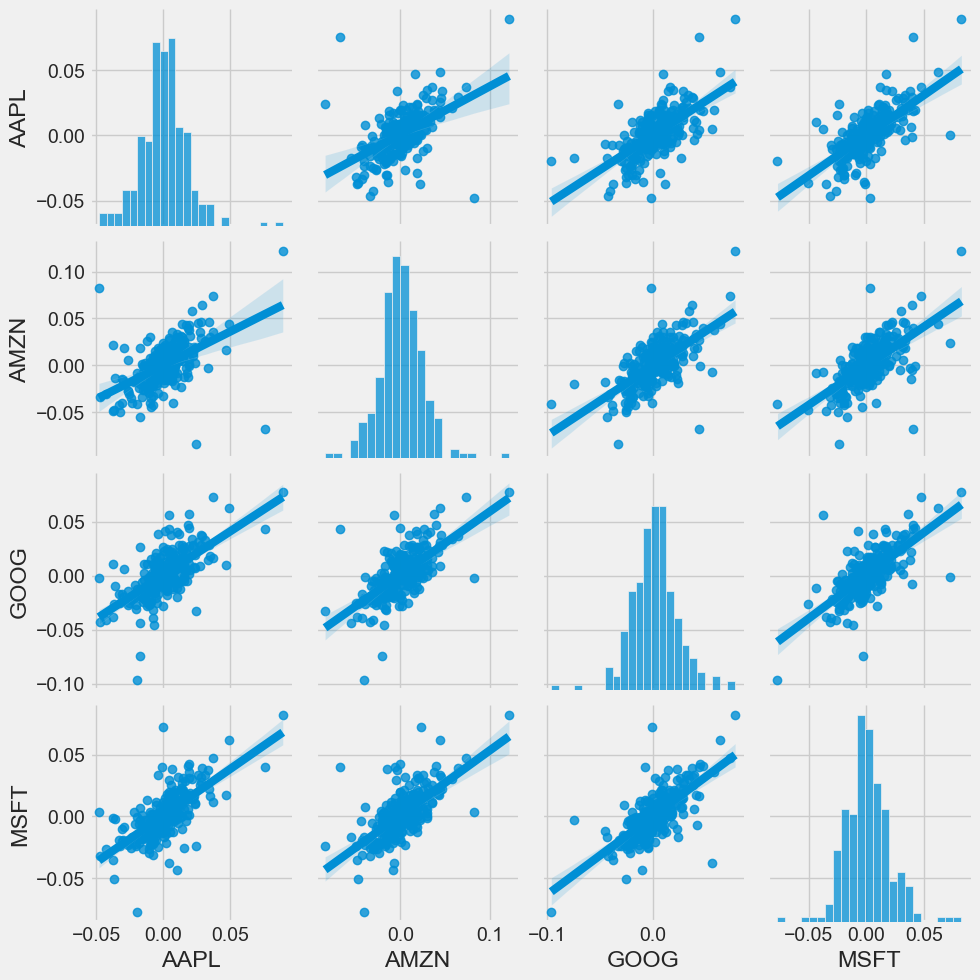

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

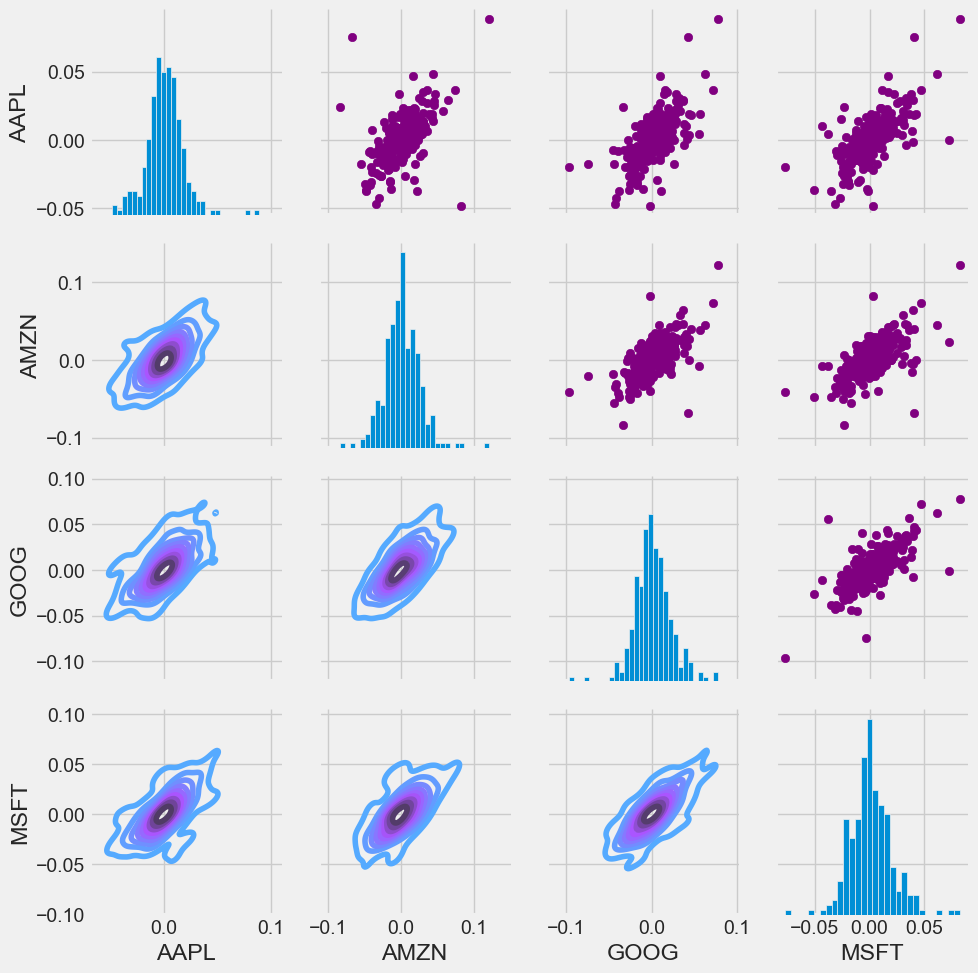

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

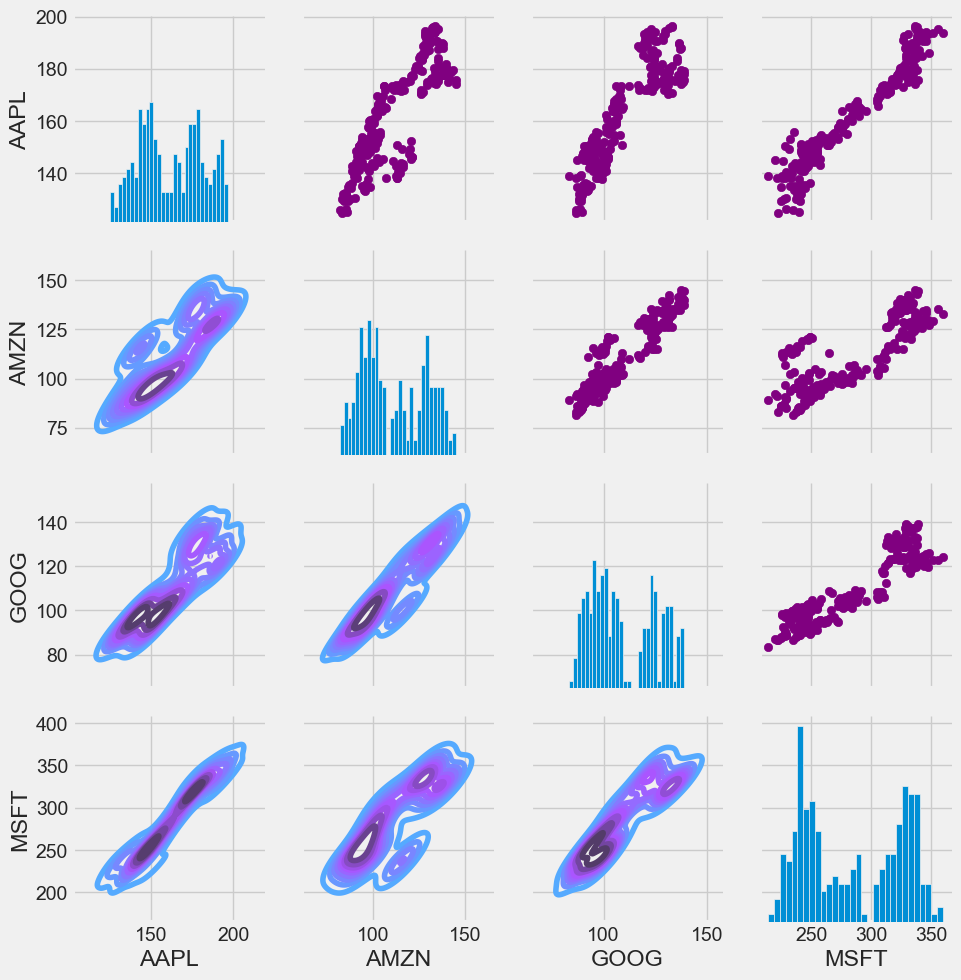

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices

Text(0.5, 1.0, 'Correlation of stock closing price')

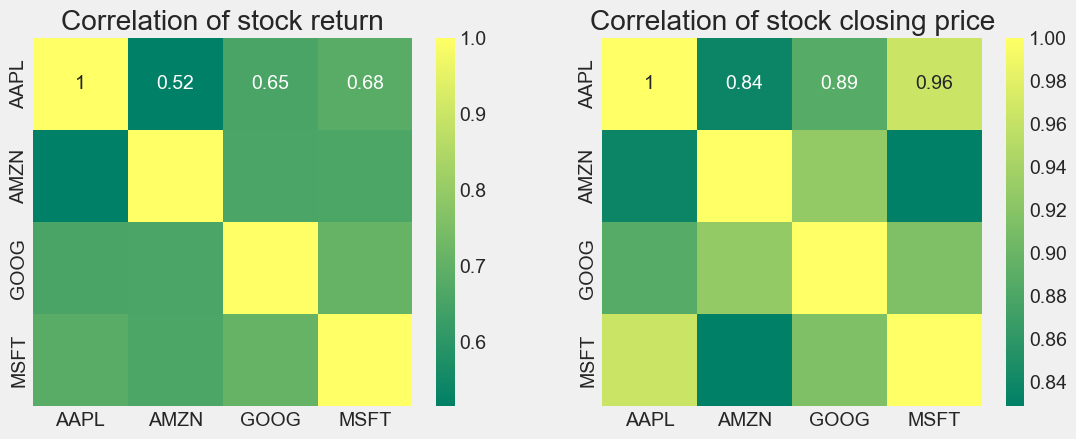

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we saw from the PairPlot, we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. 

Also, it's interesting to see that all the technology comapnies are positively correlated.

### How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Standard deviation is a way of measuring how much the values in a group of data vary from the average value

A low standard deviation means that most of the scores are close to the average. A high standard deviation means that the scores are more spread out from the average.

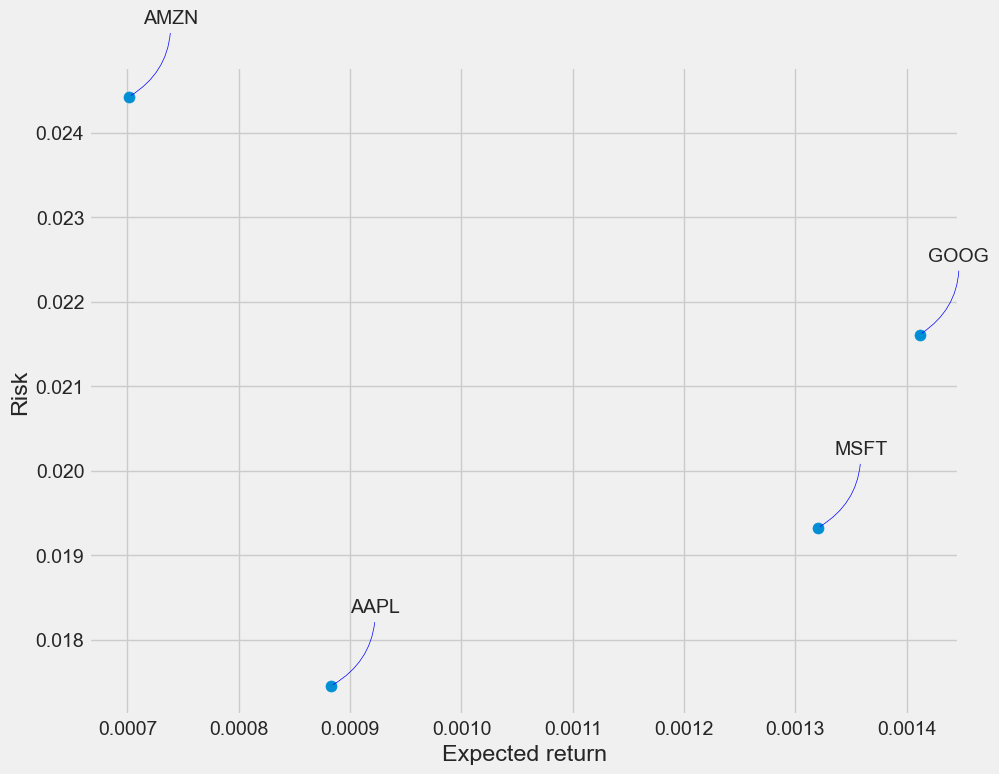

In [21]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Predicting the closing price stock price of APPLE inc:

In [22]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end= datetime.now() - timedelta(days=4))
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672228,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804702,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400


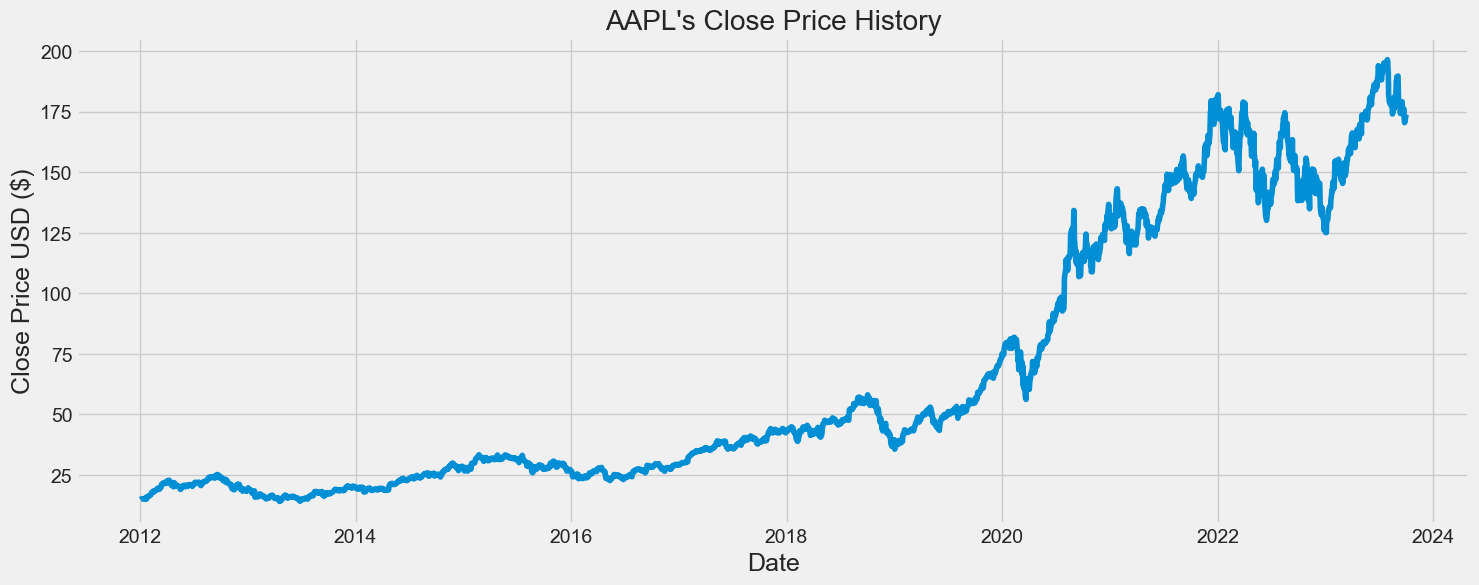

In [23]:
plt.figure(figsize=(16,6))
plt.title("AAPL's Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2809

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.85885128],
       [0.86170058],
       [0.87561816]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

model.summary()

Epoch 1/5
2749/2749 [==============================] - 151s 52ms/step - loss: 9.8520e-04 - accuracy: 3.6377e-04
Epoch 2/5
2749/2749 [==============================] - 138s 50ms/step - loss: 5.0378e-04 - accuracy: 3.6377e-04
Epoch 3/5
2749/2749 [==============================] - 137s 50ms/step - loss: 3.7498e-04 - accuracy: 3.6377e-04
Epoch 4/5
2749/2749 [==============================] - 135s 49ms/step - loss: 3.4343e-04 - accuracy: 3.6377e-04
Epoch 5/5
2749/2749 [==============================] - 141s 51ms/step - loss: 2.6710e-04 - accuracy: 3.6377e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)          

In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 3s 51ms/step


2.4047219767810843

C:\Users\demon\AppData\Local\Temp\ipykernel_17160\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


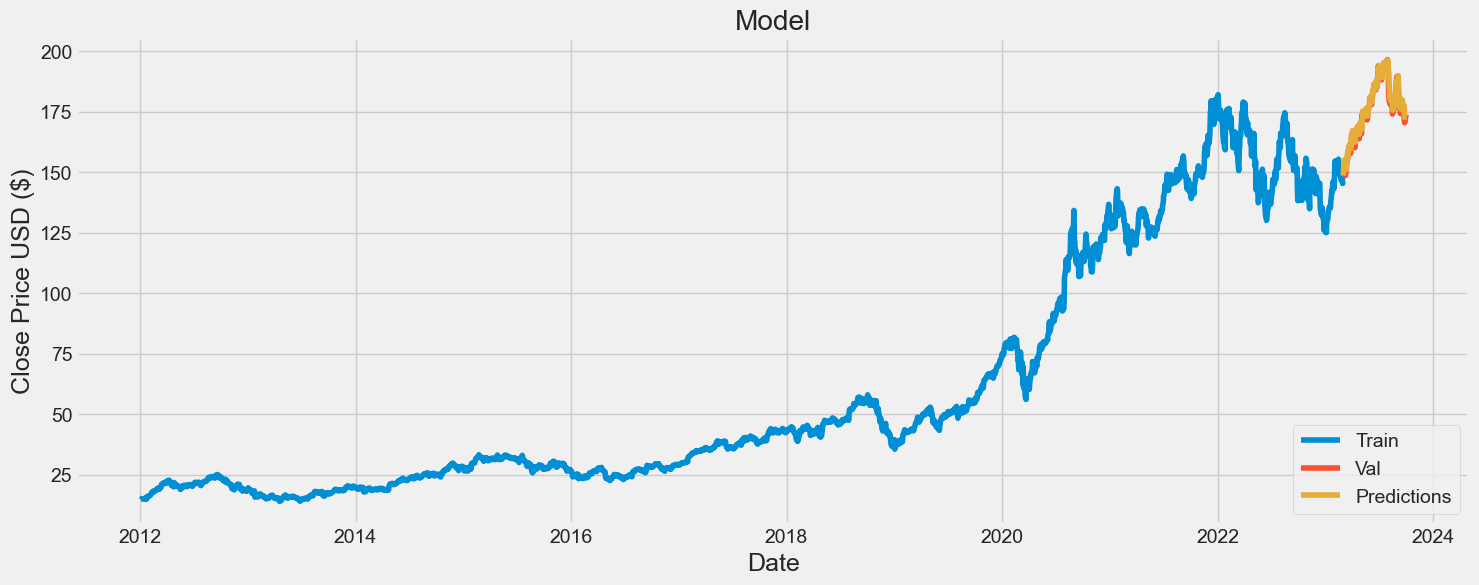

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-03-03,151.029999,148.555145
2023-03-06,153.830002,153.017715
2023-03-07,151.600006,155.033417
2023-03-08,152.869995,153.081741
2023-03-09,150.589996,154.881180
...,...,...
2023-09-26,171.960007,177.391068
2023-09-27,170.429993,173.340942
2023-09-28,170.690002,172.583694


In [31]:
# Assuming you already have the 'model' and 'scaler' from your code

# Prepare input data for the next day's prediction (use the entire dataset)
input_sequence = scaled_data  # Input sequence is the entire dataset
input_sequence = input_sequence.reshape(1, -1, 1)  # Reshape it for the model input

# Make the prediction for the next day's price
next_day_prediction = model.predict(input_sequence)

# Inverse transform to get the actual predicted price
predicted_price_next_day = scaler.inverse_transform(next_day_prediction)

print("Predicted Close Price for the Next Trading Day:", predicted_price_next_day)

1/1 [==============================] - 3s 3s/step
Predicted Close Price for the Next Trading Day: [[175.12315]]


In [32]:
# Assuming you have the 'model' and 'scaler' from your previous code

# Prepare input data for the next day's prediction
last_60_days = scaled_data  # Take the last 60 days of scaled data
input_sequence = last_60_days.reshape(1, -1, 1)  # Reshape it for the model input

# Predict prices for the next seven days
predicted_prices = []

for _ in range(7):
    # Make the prediction for the next day's price
    next_day_prediction = model.predict(input_sequence)
    
    # Inverse transform to get the actual predicted price
    predicted_price_next_day = scaler.inverse_transform(next_day_prediction)
    
    # Append the predicted price to the list
    predicted_prices.append(predicted_price_next_day[0, 0])
    
    # Update the input sequence for the next prediction
    input_sequence = np.append(input_sequence, next_day_prediction.reshape(1, 1, 1), axis=1)
    input_sequence = input_sequence[:, 1:]  # Remove the oldest day's prediction

print("Predicted Close Prices for the Next Seven Trading Days:", predicted_prices)


1/1 [==============================] - 1s 654ms/step
Predicted Close Prices for the Next Seven Trading Days: [175.12315, 176.03975, 176.93353, 177.82697, 178.70769, 179.5654, 180.39285]


In [33]:
from datetime import timedelta

# Assuming you have 'predicted_prices' as a list of predicted close prices for the next seven days

# Get the last date from your original dataset
last_date_original_data = df.index[-1]

# Create a date sequence for the next seven days
date_sequence = [last_date_original_data + timedelta(days=i) for i in range(1, 8)]

# Create a DataFrame with dates and predicted prices
predicted_df = pd.DataFrame({'Date': date_sequence, 'Predicted_Close_Price': predicted_prices})

# Set the 'Date' column as the index
predicted_df.set_index('Date', inplace=True)

# Display the DataFrame
print(predicted_df)

            Predicted_Close_Price
Date                             
2023-10-03             175.123154
2023-10-04             176.039749
2023-10-05             176.933533
2023-10-06             177.826965
2023-10-07             178.707687
2023-10-08             179.565399
2023-10-09             180.392853


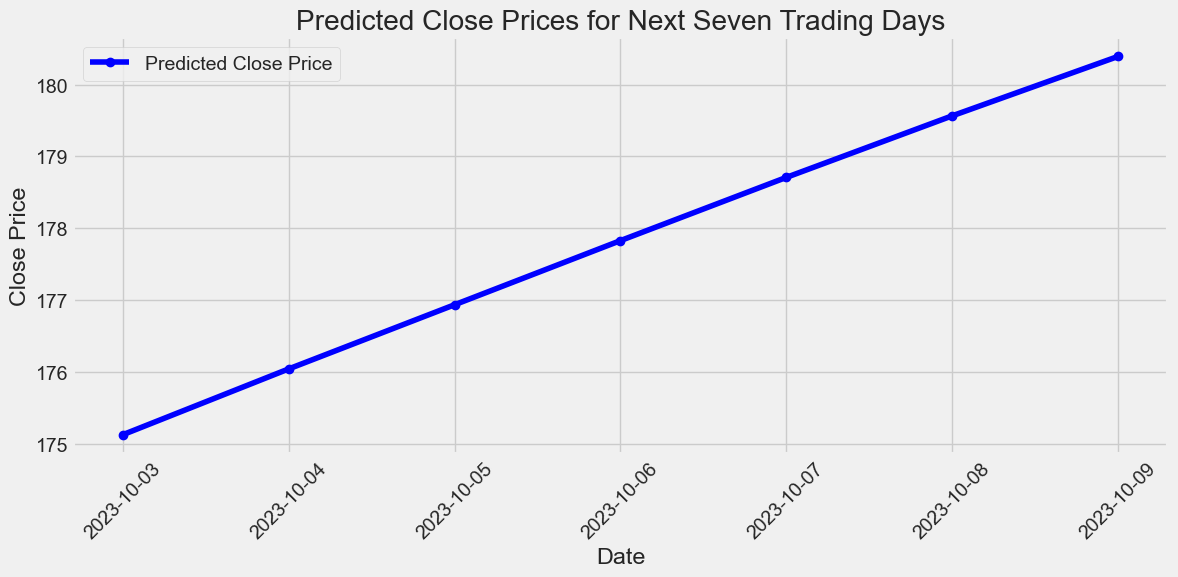

In [34]:
import matplotlib.pyplot as plt

# Creating a line plot for the predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(predicted_df.index, predicted_df['Predicted_Close_Price'], marker='o', linestyle='-', color='b', label='Predicted Close Price')
plt.title('Predicted Close Prices for Next Seven Trading Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()